## In text Exercises

* Take the binomial distribution
    \begin{align*}
        p(y) = (n y) \mu^y (1- \mu)^{n- y} \\
        y << n \; \& \text{ as}\; n \to \infty \\
        n \mu \to \lambda > 0
    \end{align*}
    Show:
    \begin{align*}
        p(y) \to \frac{e^{-\lambda} \lambda^y}{y!} \\
        y \in {0, 1, 2, \ldots}
    \end{align*}
    **Hint**: replace with factorial and then work through. Fix y and then take n to infinity:
    
    \begin{align*}
        \sum_{y=0}^{\infty} \frac{e^{-\lambda}\lambda^y}{y!} = 1
            && \text{the Poisson density, can be seen as limit of binomial density}
    \end{align*}
    

$
    \begin{align*}
        p(x) &= \begin{pmatrix}n \\ x \end{pmatrix} \mu^x (1- \mu)^{n-x} \\
        \text{as} \mu \to 0 \quad n &\to \infty \quad n\mu \to \lambda > 0 \\
        &= \frac{n!}{x!(n-x)!}\mu^x (1- \mu)^{n-x} \\
        &= \frac{1}{x!} \frac{n!}{(n-x)!} \frac{\lambda}{n}^x(1 -\frac{\lambda}{n})^{n-x} \\
        &= \frac{\lambda^x}{x!} \frac{n!}{(n-\lambda)!}(\frac{1}{n})^x (1 -\frac{\lambda}{n})^n (\frac{1}{n-1})^x \\
    \end{align*}
$

* The exponential distribution can be seen as a special case of the Gamma distribution where $a = 1$. In this case the normalising constant disappears, yielding the exponential density:

\begin{align*}
    \text{Gamma}(a,b) &= \text{Exp}(b)\\
    p(b) &= b e^{-by} \\
    F(y) &= 1 - e^{-by} \qquad y \geq 0
\end{align*}

Find the median as a function of b. Changing b changes the median of the distribution.

$
\begin{align*}
    F(x) = 1 - e^{-bX} = \frac{1}{2} \\
    \implies F^{\frac{1}{2}} = \log \frac{2}{b}
\end{align*}
$

## Numbered Exercises:

1. Devise an algorithm to generate $\exp(b)$ using uniform RVs 

$
\begin{align*}
    \mathbb{P}[x \leq 1 - e^{-by}] &= \mathbb{P}[1 - z \leq e^{-by}] \\
    \mathbb{P}[\ln(1-z) = -by] &= 
    \mathbb{P}[y \leq \frac{-\ln(1-z)}{b}]
\end{align*}
$

Using the change of variables, you can state that if:

$
\begin{align*}
    U \sim \text{Unif}(0,1) \implies V = 1 - U \sim \text{Unif}(0,1) \\
    \implies - \frac{1}{b} \log{U} && \text{Useful as this removes an operation}
\end{align*}
$

In [34]:
# Function to create an exponential transform of a uniform variable
# Returning a vector
trans_hist.function <- function(x, b) {
   vec = runif(n)
    transform = -log(1-vec) / b
    return(transform)
}	

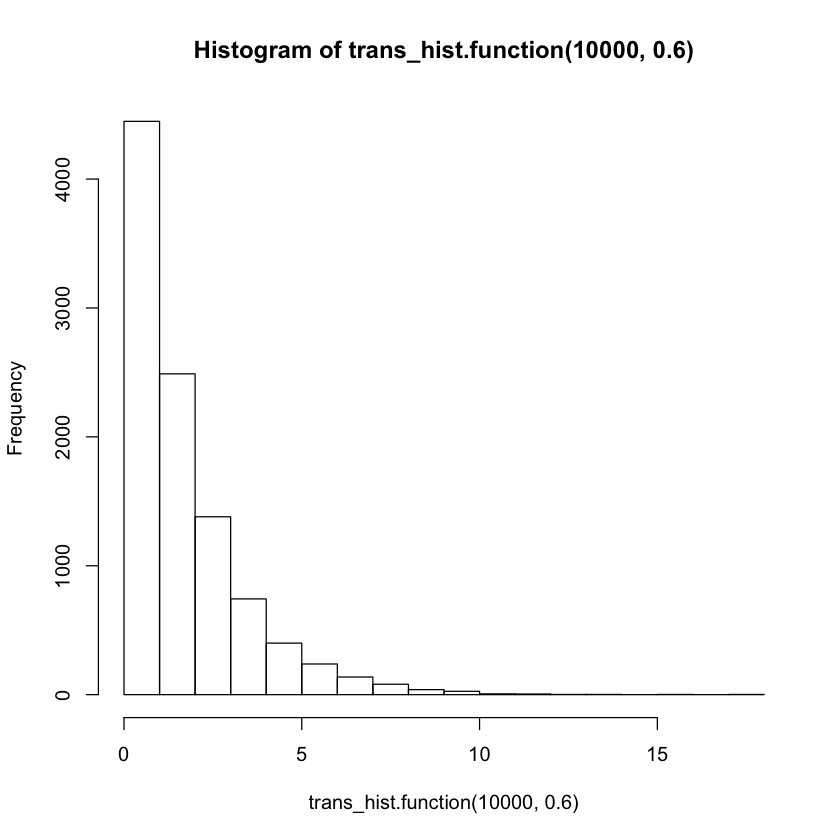

In [35]:
hist(trans_hist.function(10000,0.6))

2. Trivial copula: create a statistical model for a pair of random variables, such that, marginally, they have the same distribution.
$$
\begin{align*}
        X \sim \exp(b) \\
        Y \sim \exp(b) \\
    \end{align*}
$$
But x tends to be large when y tends to be small. This is a copula as it is a joint model with fixed marginals.

Constraining the two variables such that $X = 1 - Y$ and using the transformation of the above uniform variable to create the exponential variables, the two random variables are created as follows:

$
\begin{align*}
    X &= F^{-1}(u) \sim \exp(b) \\
    Y &= F^{-1}(1-u) \sim \exp(b)
\end{align*}
$

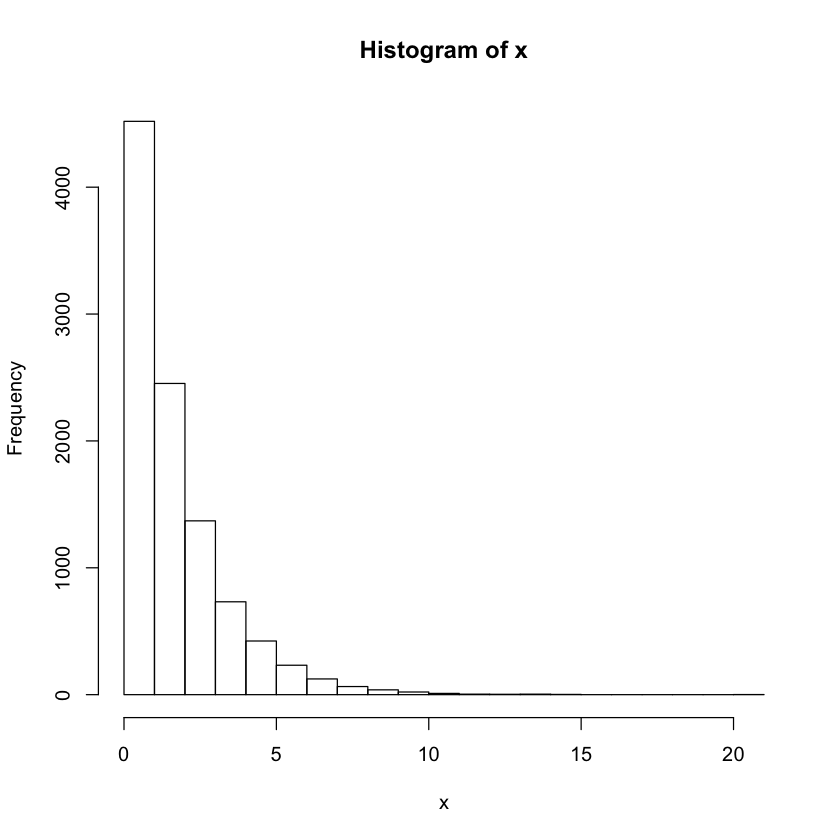

In [22]:
vec = runif(n)
x = -log(vec) / b
hist(x)

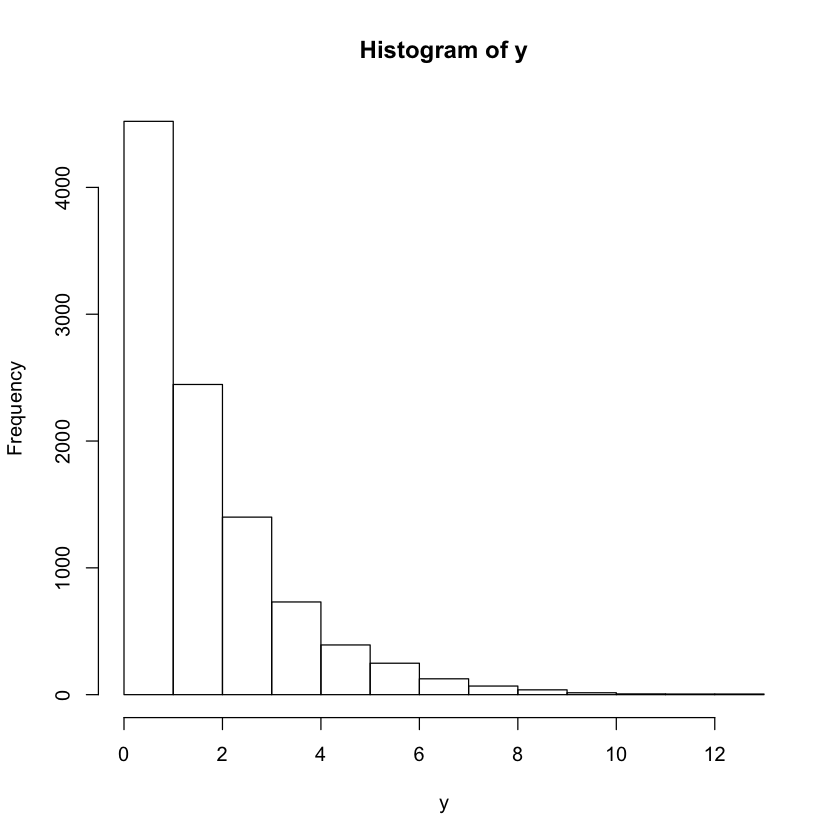

In [37]:
y = -log(1-vec) / b
hist(y)

For dependent variables, [ https://www.stat.ncsu.edu/people/bloomfield/courses/st810j/slides/copula.pdf ], suggests that the minimum function will yield a copula.

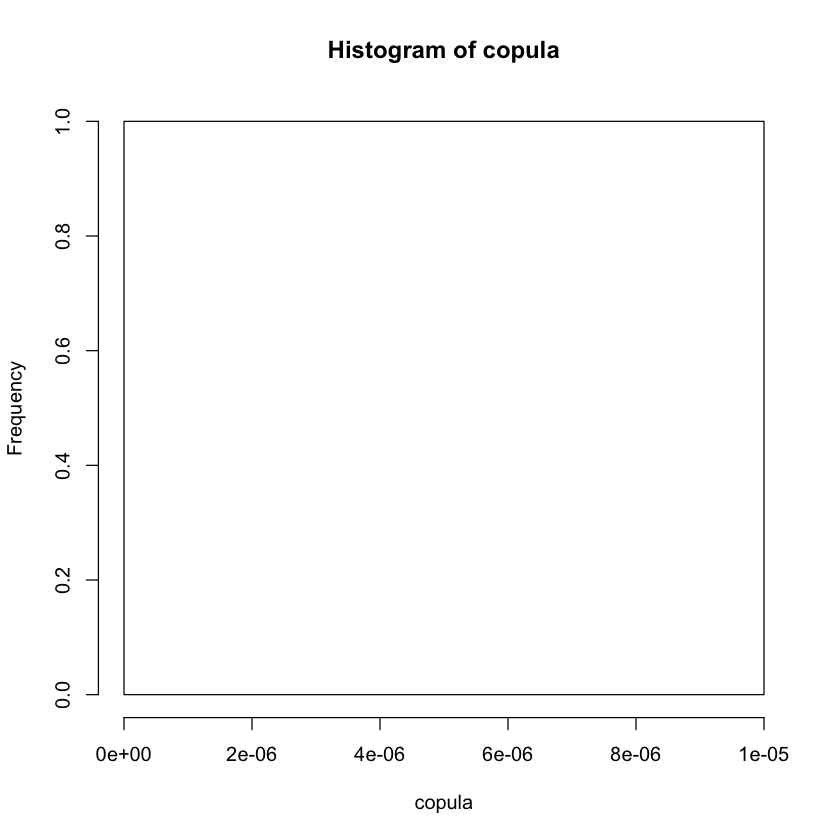

In [40]:
copula = min(x,y)
hist(copula)

In [42]:
cor(x,y)

[1] -0.6522356

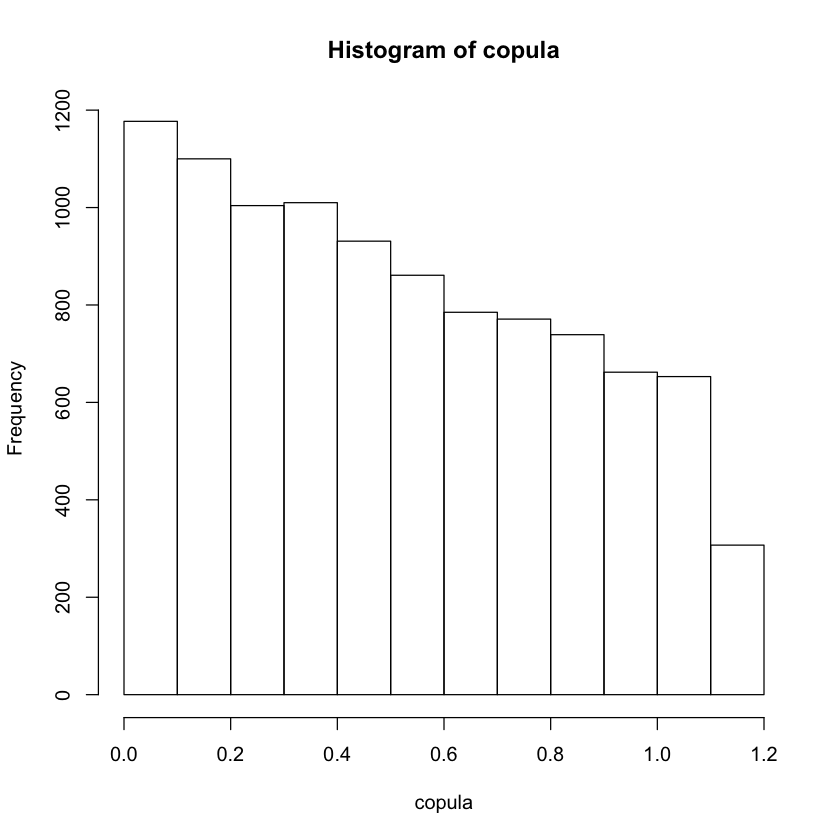

In [38]:
copula = pmin(x,y)
hist(copula)

The constraint we have chosen is to use $X = 1 - Y$. Instead, we could perform a random draw for X and, if it was above or below a specified threshold for "large" and/or "small", subsequently draw $Y$ from a truncated uniform drawn between the threshold and the extremum. This would reduce the dependency of the two variables and, again from [ https://www.stat.ncsu.edu/people/bloomfield/courses/st810j/slides/copula.pdf ], it is thought this would require an application of Sklar's Theorem.

Aside on plotting Copulas in Python (this notebook is using an R kernel instead)
[ https://twiecki.io/blog/2018/05/03/copulas/]

### Feedback session
Taking them with different exponential distributions:

$$
\begin{align*}
    (X,Y) \\
    X \sim \exp(b_x) \\
    Y \sim \exp(b_y) \\
\end{align*}
$$
To model this, approach it as:
$$
\begin{align*}
    X = \frac{1}{b_x} \log(1-U) \\
    Y = \frac{1}{b_y} \log(U)
\end{align*}
$$
This does not allow for enough control, so instead:
$$ \begin{align*}
    X = \frac{1}{b_x} \log(U_x) \\
    Y = \frac{1}{b_y} \log(U_y)
\end{align*} $$
using $(U_X, U_Y)$, instead use something like:
$$ \begin{align*}
    U_Y &= 1 - U_X && \text{initial transformation}\\
    U_Y &= (1 - \rho) U_X  + \rho Z && \text{constrained transformation}\\
\end{align*} $$
Another approach is to take the bivariate standard normal distribution and introduce correlation:
$$ \begin{align*}
    \mathcal{N}(\begin{pmatrix} 0 \\ 0 \end{pmatrix}, \begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix}) \\
    \begin{pmatrix}Z_x \\ Z_y \end{pmatrix} \sim \\
    U_X = \Phi(Z_X) \qquad U_Y = \Phi(Z_Y) \\
    Z_X = \Phi^{-1}(U) \qquad U = \Phi(Z_X) \\
    X = \frac{1}{b_x} \log(\Phi(Z_x) \\
\end{align*} $$
$$ \begin{align*}
    Y = \frac{1}{b_y} \log(\Phi(Z_y))
\end{align*} $$
Then using the change of variables you can generate the joint density using a Gaussian Copula
$$
\begin{align*}
    p(x, y; b_x, b_y, \rho) 
\end{align*}
$$
Which gives you three parameters, two to control the exponentials and one to control the correlation

3. Unsupervised learning with prior information. Supermarket chain with 2 kinds of customers:
$$
\begin{align*}
        \text{Customer} \in \{ \text{SINGLE}, \text{FAMILY} \}
\end{align*}
$$
   * FAMILY : $\mathbb{P}[Y|x=0] = \mathcal{N}(80,10)$
   * SINGLE : $\mathbb{P}[Y|x=1] = \mathcal{N}(30,5)$
   * 30\% single $\implies \lambda = 0.3$
   
Develop an algorithm that is able to identify single customers on the basis of their spending. (Basic classifier)

$
\begin{align*}
    \mathbb{P}[X=1|y] &= \frac{\mathbb{P}[\text{SINGLE}]\cdot\mathbb{P}[Y|X=1]}{\mathbb{P}[\text{SINGLE}]\cdot\mathbb{P}[Y|X=1]+\mathbb{P}[\text{FAMILY}]\cdot\mathbb{P}[Y|X=0]} \\
    &= \frac{0.3 \cdot \frac{1}{\sqrt{2 \times \pi \times 0.05}} \cdot \exp \left( -\frac{1}{2\times0.05}(y - 30)^2 \right)}{0.3 \cdot \frac{1}{\sqrt{2 \times \pi \times 0.05}} \cdot \exp \left( -\frac{1}{2\times0.05}(y - 30)^2 \right) + 0.7 \cdot \frac{1}{\sqrt{2 \times \pi \times 0.10}} \cdot \exp \left( -\frac{1}{2\times0.10}(y - 80)^2 \right) + } \\
&= \frac{0.535 \times \exp(-10 \times (y-30)^2}
    {0.535 \times \exp(-10 \times (y-30)^2 +
    1.249 \times \exp(-5 \times (y-80)^2} 
\end{align*}
$
<!--    
-->

In [49]:
calc_norm.function <- function(y, mean, var) {
    return ((1 / sqrt(2*3.14*var) ) * exp(- (1 / (2*var)*(y - mean)^2)))                   
}	

In [62]:
mean_fam = 80
var_fam = 10 
mean_sing = 30
var_sing = 5
lambda = 0.3

y = runif(1)

prob = lambda * calc_norm.function(y, mean_sing, var_sing) /
    ( (lambda * calc_norm.function(y, mean_sing, var_sing)) + 
    ((1 - lambda) * calc_norm.function(y, mean_fam, var_fam)) )

#0.535 * exp(-10*(y-30))^2 / (0.535 * exp(-10*(y-30))^2 + 1.249 * exp(-10*(y-30))^2 + 

In [63]:
print(y)
print(prob) # This seems somewhat incorrect as it is yielding a value of 1 so...

[1] 0.009650257
[1] 1


4. Supervised Hidden Markov Models
    * Experts can tell state of economy.
    * Recession follows recession with probability 70%
    * Boom follows boom with probability 90%
    * Hedge fund tries to predict using macro-economic variables one quarter ahead
    * Will know current state of economy.
    * Sources are looking at unemployment.
    * In quarters with recessions, unemployment varied as:
    $$
    \begin{align*}
        R &: \mathcal{N}(0.25,0.05) \\
        B &: \mathcal{N}(0.1,0.01)
    \end{align*}
    $$
      1. Is the state of the economy independent of the unemployment rate?
      2. Is the state of the economy independent over time?
      3. Currently in recession and new unemployment figure is 0.2. What is the probability of recession for the next quarter?

$$\begin{align*}
R \to B \quad 0.7 \\
B \to R \quad 0.9 \\
R \sim \mathcal{N}(0.25, 0.05) \\
B \sim \mathcal{N}(0.10, 0.01)
\end{align*}$$

### Feedback session

A. The state of the economy is not independent of the unemployment rate because 
$$ \begin{align*}
    X_t \in \{0,1\}
    P(Y_t|X_t)
\end{align*} $$
As X and Y are related, the economy is not independent of the unemployment rate

B. Given the data that has been given, we have to assume the Markov property, we can't show it. We do think there is some dependence over time, as there is a transition probability.

| $x_{t-1}$ \ $x_t$| 0 | 1 |
|-------------------------------|---|---|
|  0 | 0.7 | 0.3 |
|  1 | 0.1 | 0.9 |
C. 

$$\begin{align*}\require{cancel}
    X_t \perp \! \! \! \perp X_{t-2} | X_{t-1} \\
    Y_t \perp X_{t-1} | X_{t} \\
    Y_t = 0.2 \quad X_{t-1} = 0 \\
    \mathbb{P}[X_t = 0 | X_t-1 = 0. y_t = 0.2] = \frac{\mathbb{P}[X_{t-1}=0, X_t=0, Y_t = 0.2}{\mathbb{P}[X_{t-1}=0, Y_t  = 0.2}\\
    \frac{\cancel{\mathbb{P}[X_t = 0]}\cdot \mathbb{P}[X_t = 0 | X_{t-1}=0] \mathbb{P}[Y_t = 0.2 | X_T = 0, X_{t-1}=0]}{\cancel{\mathbb{P}[X_t = 0]}\mathbb{P}[Y_t = 0.2 | X_{t-1} = 0]}
\end{align*} $$
$$\begin{align*}
    %
\end{align*} $$